In [18]:
# SPDX-License-Identifier: (GPL-2.0+) 

import csv
import networkx as nx
import matplotlib.pyplot as plt
import show_graphs as sg

In [19]:
trade_data = csv.DictReader(open('data/cow/Dyadic_COW_4.0_shortened.csv', 'r'))
trade_data = list(trade_data)
dispute_data = csv.DictReader(open('data/mid/MIDB_5.0.csv', 'r'))
dispute_data = list(dispute_data)

In [20]:
conflict_num = input("Enter a conflict number.  Type \"exit\" without the quotes to leave\n")
if conflict_num == "exit":
    print("Goodbye")
    exit(0)
try:
    conflict_num = int(conflict_num)
except ValueError:
    print("Invalid conflict number")
    exit(0)

print("Parsing conflict number.")
instigatorsA, instigatorsB, sideA, sideB, start_year = sg.parse_conflict_num(dispute_data, conflict_num)

if int(start_year) == -1:
    print("Conflict number {0} does not exist".format(str(conflict_num)))
    exit(0)

print("Retrieving trade partners")
instigatorsA_trade_partners, instigatorsB_trade_partners = sg.get_conflict_trade_partners(
    trade_data,
    instigatorsA, 
    instigatorsB, 
    start_year
)

print("Parsing trade data for side A")
trade_valuesA = sg.parse_trade_data(trade_data, instigatorsA_trade_partners, start_year) if len(instigatorsA_trade_partners) > 1 else None

print("Parsing trade data for side B")
trade_valuesB = sg.parse_trade_data(trade_data, instigatorsB_trade_partners, start_year) if len(instigatorsB_trade_partners) > 1 else None

print("Calculating trade percentages for side A")
trade_percentagesA = sg.calculate_trade_percentages(trade_valuesA) if trade_valuesA is not None else None

print("Calculating trade percentages for side B")
trade_percentagesB = sg.calculate_trade_percentages(trade_valuesB) if trade_valuesB is not None else None


Enter a conflict number.  Type "exit" without the quotes to leave
611
Parsing conflict number.
Retrieving trade partners
Parsing trade data for side A
Parsing trade data for side B
Calculating trade percentages for side A
Calculating trade percentages for side B


In [21]:
print("Side A Summary:")
sg.show_summary(trade_percentagesA, sideA, instigatorsA)
print("Side B Summary:")
sg.show_summary(trade_percentagesB, sideB, instigatorsB)


Side A Summary:
Instigators: ['USA']
Combatants: ['THI', 'ROK', 'PHI', 'AUL', 'NEW', 'USA', 'RVN', 'CAM']
Linear Regression: y = 0.16277055959305903x + 0.0274597478370846
Logistic Regression: y = 1/(1+e^-([0.02745975] + [[0.34474674]]x))
Side B Summary:
Instigators: ['DRV']
Combatants: ['CHN', 'USR', 'DRV']
Linear Regression: y = 0.0x + 0.0
Logistic Regression model not available


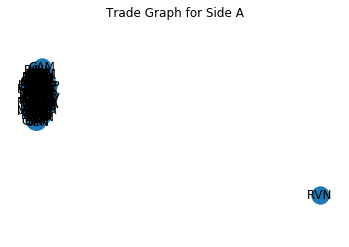

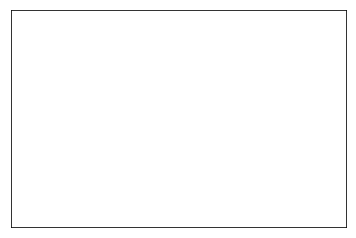

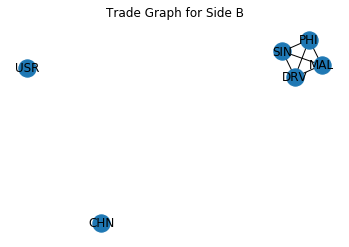

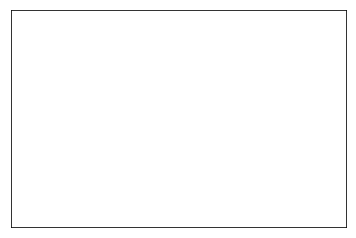

In [13]:
if trade_valuesA != None: sg.draw_trade_war_graphs(instigatorsA, sideA, trade_valuesA, 'A')
if trade_valuesB != None: sg.draw_trade_war_graphs(instigatorsB, sideB, trade_valuesB, 'B')
